# Loan Approval Predict

In [ ]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [298]:
df=pd.read_csv('./../data/loan_prediction.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [299]:
df=df.drop('Loan_ID',axis=1)
df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [300]:
#shape of data
df.shape

(614, 12)

In [301]:
# Get information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [302]:
#descriptive statistics of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [303]:
# Count of non-null values in each column
df.count()

Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [304]:
## Check for missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [305]:
# Fill missing values in categorical columns with mode
df['Gender'].fillna(df['Gender'].mode(), inplace=True)
df['Married'].fillna(df['Married'].mode(), inplace=True)
df['Dependents'].fillna(df['Dependents'].mode(), inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode(), inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [306]:
# Fill missing values in LoanAmount with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

# Fill missing values in LoanAmount_term with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

#Fill missing values in Credit_History with mode

df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)


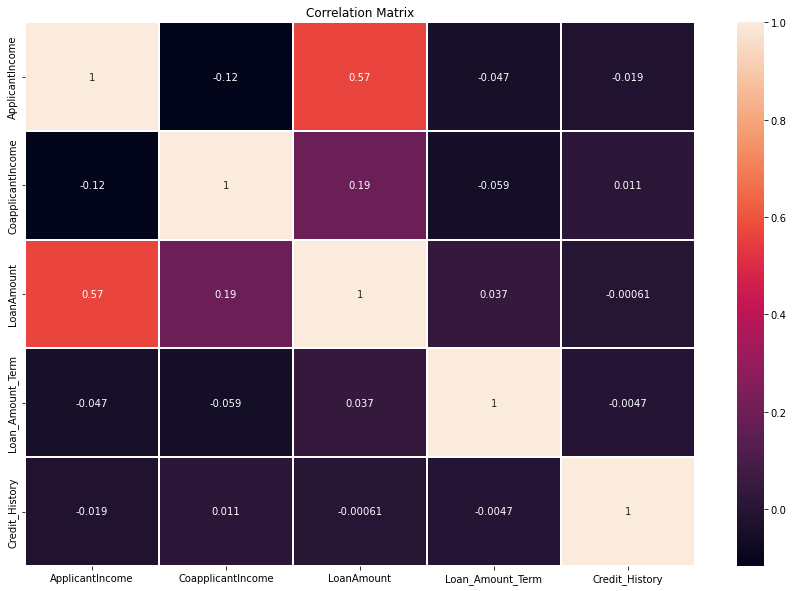

In [307]:
#Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.2)
plt.title("Correlation Matrix")
plt.show()

### EDA

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64


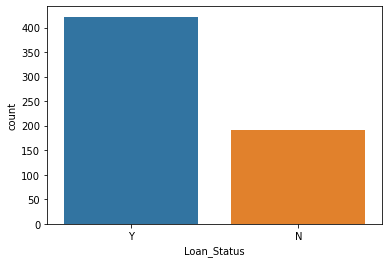

In [308]:
sns.countplot(data=df, x='Loan_Status')
# Get the count values of each category
print(df['Loan_Status'].value_counts())
# Get the count values of each category in percentage
print(df['Loan_Status'].value_counts() / len(df) * 100)

Yes    398
No     213
Name: Married, dtype: int64
Yes    64.820847
No     34.690554
Name: Married, dtype: float64


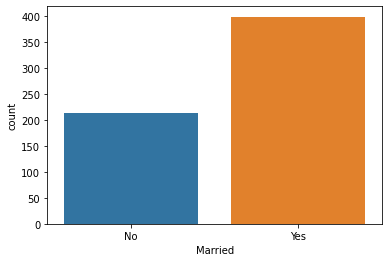

In [309]:
sns.countplot(data=df, x='Married')
# Get the count values of each category
print(df['Married'].value_counts())
# Get the count values of each category in percentage
print(df['Married'].value_counts() / len(df) * 100)

Male      489
Female    112
Name: Gender, dtype: int64
Male      79.641694
Female    18.241042
Name: Gender, dtype: float64


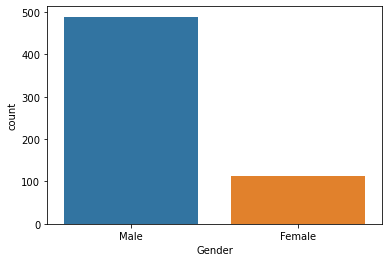

In [310]:
sns.countplot(data=df,x='Gender')
print(df['Gender'].value_counts())
print(df['Gender'].value_counts()/len(df)*100)

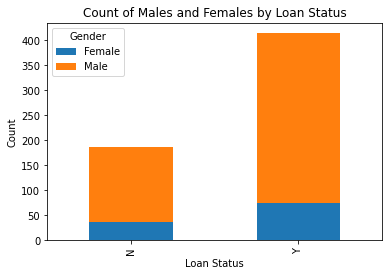

Gender       Female  Male
Loan_Status              
N                37   150
Y                75   339


In [311]:

# Filter the DataFrame based on loan_status = 'YES' or 'NO'
filtered_data = df[df['Loan_Status'].isin(['Y', 'N'])]

# Count the number of males and females for each loan status
gender_counts = filtered_data.groupby(['Loan_Status', 'Gender']).size().unstack()

# Plot the counts
gender_counts.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Count of Males and Females by Loan Status')

# Show the plot
plt.show()

print(gender_counts)

No     500
Yes     82
Name: Self_Employed, dtype: int64
No     81.433225
Yes    13.355049
Name: Self_Employed, dtype: float64


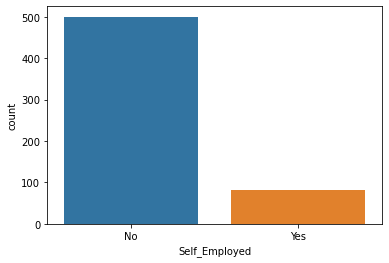

In [312]:
sns.countplot(data=df,x='Self_Employed')
print(df['Self_Employed'].value_counts())
print(df['Self_Employed'].value_counts()/len(df)*100)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

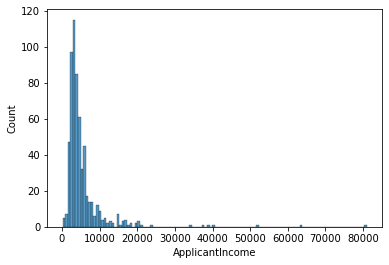

In [313]:
sns.histplot(data=df, x='ApplicantIncome')

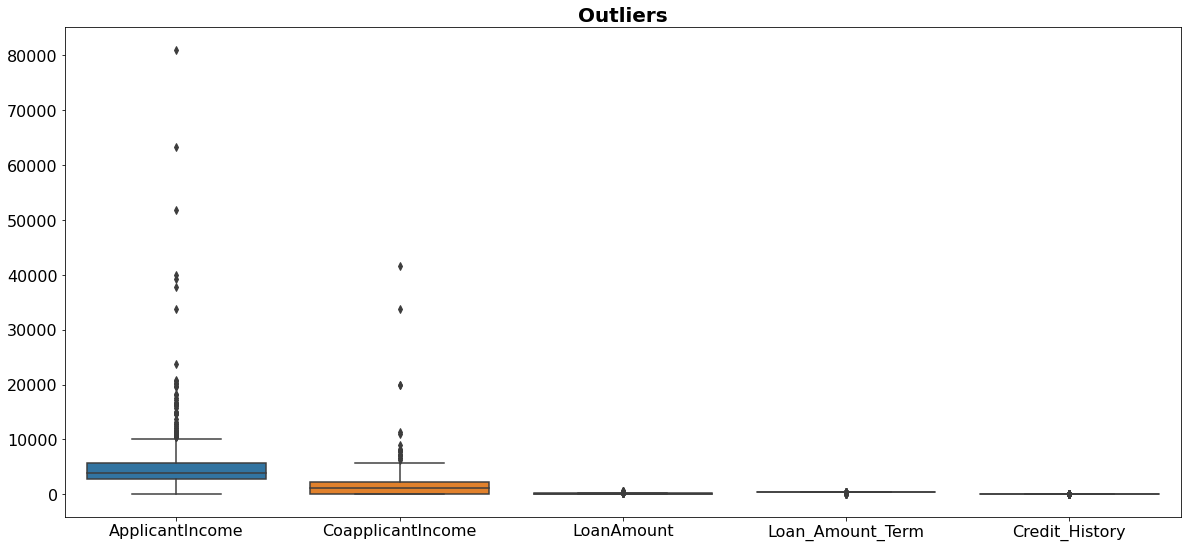

In [314]:
#outliers
plt.figure(figsize=(20,9))
sns.boxplot(data=df)

plt.title("Outliers", fontsize=20, fontweight='bold')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [315]:
#outlier detection using IQR Method
def detect_outliers_iqr(df):
    outliers = []
    data = sorted(df)
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [316]:
# Driver code

#ApplicantIncome_outliers

ApplicantIncome_outliers = detect_outliers_iqr(df['ApplicantIncome'])
print("Outliers from IQR method of ApplicantIncome: ", ApplicantIncome_outliers)
len(ApplicantIncome_outliers)

Outliers from IQR method of ApplicantIncome:  [10408, 10416, 10513, 10750, 10833, 11000, 11146, 11250, 11417, 11500, 11757, 12000, 12000, 12500, 12841, 12876, 13262, 13650, 14583, 14583, 14683, 14866, 14880, 14999, 15000, 15759, 16120, 16250, 16525, 16666, 16667, 16692, 17263, 17500, 18165, 18333, 19484, 19730, 20166, 20233, 20667, 20833, 23803, 33846, 37719, 39147, 39999, 51763, 63337, 81000]


50

In [317]:
# Replace with mode
import statistics as st
for i in ApplicantIncome_outliers:
    df['ApplicantIncome']= np.where(df['ApplicantIncome']==i,st.mode(df['ApplicantIncome']) ,df['ApplicantIncome'] )

In [318]:
#CoapplicantIncomee_outliers

CoapplicantIncome_outliers = detect_outliers_iqr(df['CoapplicantIncome'])
print("Outliers from IQR method of CoapplicantIncome: ", CoapplicantIncome_outliers)
len(CoapplicantIncome_outliers)


# Replace with mode
import statistics as st
for i in CoapplicantIncome_outliers:
    df['CoapplicantIncome']= np.where(df['CoapplicantIncome']==i,st.mode(df['CoapplicantIncome']) ,df['CoapplicantIncome'] )


Outliers from IQR method of CoapplicantIncome:  [6250.0, 6666.0, 6667.0, 7101.0, 7166.0, 7210.0, 7250.0, 7750.0, 7873.0, 8106.0, 8333.0, 8980.0, 10968.0, 11300.0, 20000.0, 20000.0, 33837.0, 41667.0]


Y    422
N    192
Name: Loan_Status, dtype: int64
Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64


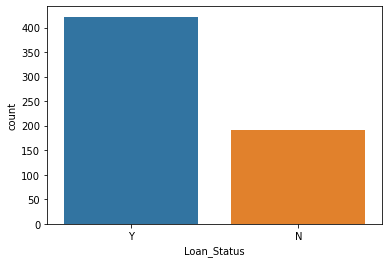

In [319]:
sns.countplot(data=df, x='Loan_Status')
# Get the count values of each category
print(df['Loan_Status'].value_counts())
# Get the count values of each category in percentage
print(df['Loan_Status'].value_counts() / len(df) * 100)

### Data Preparation and Training

In [320]:
# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents'
            , 'Education', 'Self_Employed', 'Property_Area','Loan_Status']
df = pd.get_dummies(df, columns=cat_cols,drop_first=True)

In [321]:
# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']


In [322]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy=1,random_state=42)
X_res, y_res = os.fit_resample(X, y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 422, 0: 192})
Resampled dataset shape Counter({1: 422, 0: 422})


In [323]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


# MODEL

In [324]:
#split our training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [325]:
# Scale the numerical columns using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
468,-1.938816,1.230393,-0.611789,0.262421,0.543678,0,1,0,1,0,1,0,1,0
786,-0.107237,-0.827965,-0.434645,2.179461,0.543678,1,0,0,0,0,0,0,0,1
538,-0.538227,-0.449741,-0.989696,0.262421,0.543678,1,1,0,0,0,1,0,0,0
266,0.388428,0.150761,0.002309,0.262421,0.543678,1,1,0,1,0,0,0,1,0
352,-0.668093,0.641888,-0.647218,0.262421,0.543678,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.077353,0.495114,-0.623599,0.262421,0.543678,1,1,0,1,0,1,1,1,0
106,-0.753981,-0.033412,0.888028,0.262421,0.543678,1,1,0,1,0,0,0,0,1
270,-0.372660,-0.827965,-1.414841,0.262421,0.543678,0,0,0,0,0,0,0,0,1
435,3.150803,-0.827965,-0.257501,-1.654618,0.543678,0,0,0,0,0,0,0,1,0


In [326]:
y_train

468    1
786    0
538    0
266    1
352    1
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status_Y, Length: 675, dtype: uint8

In [327]:
df.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [334]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [335]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


# Define the models and their respective parameter grids
models = {
    'RandomForest': (RandomForestClassifier(),
                     {'n_estimators': [100, 200, 300],
                      'max_depth': [ 5, 8,10]}),
    'SVM': (SVC(),
            {'C': [0.1, 1, 10],
             'kernel': ['linear', 'rbf']}),
    'LogisticRegression': (LogisticRegression(),
                           {'C': [0.1, 1, 10],
                            'solver': ['liblinear', 'lbfgs']}),
    'GradientBoosting': (GradientBoostingClassifier(),
                         {'n_estimators': [100, 200, 300],
                          'learning_rate': [0.1, 0.05, 0.01]}),
    'XGBoost': (XGBClassifier(),
                {'n_estimators': [100, 200, 300],
                 'learning_rate': [0.1, 0.05, 0.01]}),
    'NaiveBayes': (GaussianNB(),
                   {}),
    'ANN': (MLPClassifier(),
            {'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
             'activation': ['relu', 'tanh'],
             'solver': ['adam', 'sgd'],
             'alpha': [0.0001, 0.001, 0.01]})
}

# Perform grid search for each model
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Fit the model with best parameters
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Model:", model_name)
    print("Best parameters:", best_params)
    print("Best accuracy score:", best_score)
    print("Test accuracy score:", accuracy)
    print()


Model: RandomForest
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best accuracy score: 0.8488888888888889
Test accuracy score: 0.8757396449704142

Model: SVM
Best parameters: {'C': 10, 'kernel': 'rbf'}
Best accuracy score: 0.8103703703703704
Test accuracy score: 0.8165680473372781

Model: LogisticRegression
Best parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best accuracy score: 0.7392592592592593
Test accuracy score: 0.6923076923076923

Model: GradientBoosting
Best parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Best accuracy score: 0.8177777777777777
Test accuracy score: 0.863905325443787

Model: XGBoost
Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best accuracy score: 0.8399999999999999
Test accuracy score: 0.8461538461538461

Model: NaiveBayes
Best parameters: {}
Best accuracy score: 0.7274074074074074
Test accuracy score: 0.6745562130177515

Model: ANN
Best parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 25), 'solver':

In [339]:
#top 5 Features

from sklearn.feature_selection import SelectFromModel

# Define the models
models = [
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Logistic Regression', LogisticRegression())
]

# Iterate over the models
top_features = []
for model_name, model in models:
    # Feature selection using model-based feature importance
    feature_selector = SelectFromModel(model)
    feature_selector.fit(X, y)
    selected_features = X.columns[feature_selector.get_support()].tolist()
    top_features.extend(selected_features)

# Get the top 5 features based on frequency
top_5_features = pd.Series(top_features).value_counts().head(5).index.tolist()

# Print the top 5 features
print("Top 5 features : ")
for feature in top_5_features:
    print(feature)




Top 5 features : 
Credit_History
ApplicantIncome
LoanAmount
CoapplicantIncome
Education_Not Graduate


#### BEST MODEL

In [340]:
# train a final(best) model
#Random Forest classifier
best_model = RandomForestClassifier( n_estimators=100, max_depth=10)
best_model.fit(X_train,y_train)


RandomForestClassifier(max_depth=10)

In [341]:
# Save the trained model as a pickle file
import pickle
with open('loan-approval-prediction.pkl', 'wb') as file:
    pickle.dump(best_model, file)